### Name :- Mansi Sahu
### Reg no. :- 20BAI10158

                                                Assignment - 3

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Dataset download

https://drive.google.com/file/d/1NtOKehSz8SiVnk0cPZX5TFndug4SYL5T/view

### 2. Loading our Dataset

In [72]:
df = pd.read_csv("Housing.csv")

In [73]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [75]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### 3. Perform Below Visualizations.
    ● Univariate Analysis
    ● Bi - Variate Analysis
    ● Multi - Variate Analysis

(array([ 61., 163., 139.,  89.,  46.,  25.,  13.,   4.,   1.,   4.]),
 array([ 1750000.,  2905000.,  4060000.,  5215000.,  6370000.,  7525000.,
         8680000.,  9835000., 10990000., 12145000., 13300000.]),
 <BarContainer object of 10 artists>)

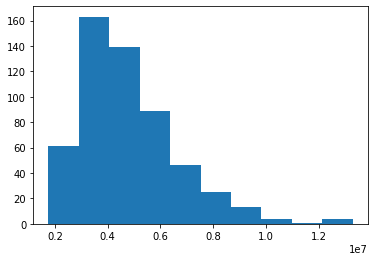

In [76]:
plt.hist(df['price'])

<BarContainer object of 545 artists>

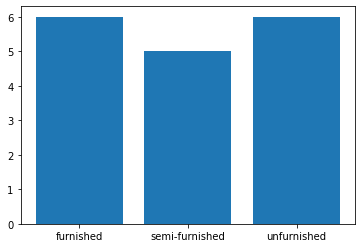

In [77]:
plt.bar(df['furnishingstatus'], df['bedrooms'])

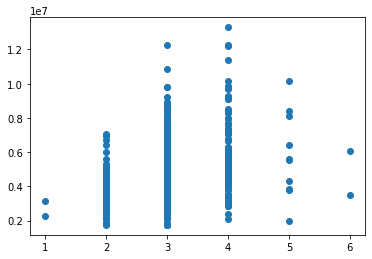

In [78]:
plt.scatter(df['bedrooms'],df['price'])

In [79]:
import seaborn as sns

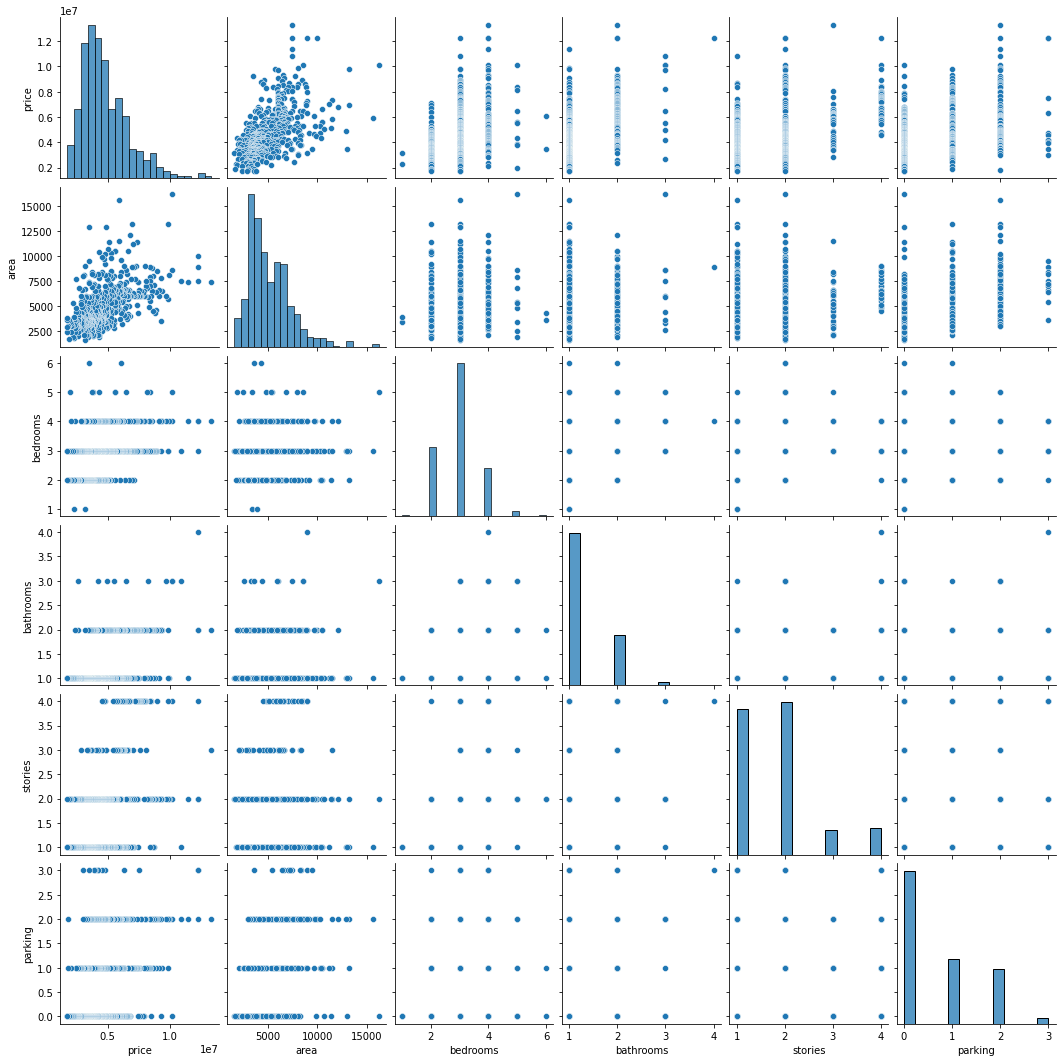

In [80]:
sns.pairplot(df)
plt.show()

### 4. Perform descriptive statistics on the dataset.

In [81]:
#Mean
df.mean()

price        4.766729e+06
area         5.150541e+03
bedrooms     2.965138e+00
bathrooms    1.286239e+00
stories      1.805505e+00
parking      6.935780e-01
dtype: float64

In [82]:
# Median
df.median()

price        4340000.0
area            4600.0
bedrooms           3.0
bathrooms          1.0
stories            2.0
parking            0.0
dtype: float64

In [83]:
# Mode
df.mode()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,3500000,6000.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,semi-furnished
1,4200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# Skewness
df.skew()

price        1.212239
area         1.321188
bedrooms     0.495684
bathrooms    1.589264
stories      1.082088
parking      0.842062
dtype: float64

In [85]:
#Kurtosis
df.kurt()

price        1.960130
area         2.751480
bedrooms     0.728323
bathrooms    2.164856
stories      0.679404
parking     -0.573063
dtype: float64

### 5. Handle the Missing values.

In [86]:
missing_values = df.isnull().sum()
missing_values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [87]:
dfNew = df.fillna(df.mean()) #Handling missing values filling it with their mean

In [88]:
dfNew.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

### 6. Find the outliers and replace the outliers

In [89]:
# Define the column(s) to check for outliers
columns_to_check = ['price', 'area']

# Define the threshold for outliers (in terms of IQR)
outlier_threshold = 55.5

# Function to detect and replace outliers
def replace_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - outlier_threshold * iqr
    upper_bound = q3 + outlier_threshold * iqr
    
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].median(), df[column])

# Loop over each column and replace outliers
for column in columns_to_check:
    replace_outliers(df, column)

# Print the dataframe with replaced outliers
print(df)

          price    area  bedrooms  bathrooms  stories mainroad guestroom  \
0    13300000.0  7420.0         4          2        3      yes        no   
1    12250000.0  8960.0         4          4        4      yes        no   
2    12250000.0  9960.0         3          2        2      yes        no   
3    12215000.0  7500.0         4          2        2      yes        no   
4    11410000.0  7420.0         4          1        2      yes       yes   
..          ...     ...       ...        ...      ...      ...       ...   
540   1820000.0  3000.0         2          1        1      yes        no   
541   1767150.0  2400.0         3          1        1       no        no   
542   1750000.0  3620.0         2          1        1      yes        no   
543   1750000.0  2910.0         3          1        1       no        no   
544   1750000.0  3850.0         3          1        2      yes        no   

    basement hotwaterheating airconditioning  parking furnishingstatus  
0         no  

### 7. Check for Categorical columns and perform encoding.

In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
le = LabelEncoder()

In [92]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000.0,7420.0,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000.0,8960.0,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000.0,9960.0,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000.0,7500.0,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000.0,7420.0,4,1,2,yes,yes,yes,no,yes,2,furnished


In [93]:
columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']

In [94]:
for i in columns:
    dfNew[i] = le.fit_transform(df[i])

In [95]:
dfNew

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0


### 8. Split the data into dependent and independent variables.

In [96]:
y = dfNew['price'] 
x = dfNew.drop(columns = ['price'], axis = 1)

In [97]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,0
1,8960,4,4,4,1,0,0,0,1,3,0
2,9960,3,2,2,1,0,1,0,0,2,1
3,7500,4,2,2,1,0,1,0,1,3,0
4,7420,4,1,2,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,2
541,2400,3,1,1,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0


In [98]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [99]:
x.shape

(545, 11)

In [100]:
y.shape

(545,)

### 9. Scale the independent variables

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scale = StandardScaler()

In [67]:
x  = scale.fit_transform(x)

In [39]:
# x_test = scale.fit_transform(x_test)

In [68]:
 x

array([[-1.17687206,  0.03201512, -0.58376171,  0.20075855, -0.78680611],
       [ 1.23991283, -1.36384432, -0.58376171, -0.93600416,  0.40020934],
       [-0.90755979, -1.36384432, -0.58376171, -0.93600416, -0.78680611],
       ...,
       [-0.54457369,  0.03201512, -0.58376171, -0.93600416, -0.78680611],
       [-1.53938979, -1.36384432, -0.58376171, -0.93600416, -0.78680611],
       [-0.40406294,  1.42787457, -0.58376171,  0.20075855, -0.78680611]])

### 10. Split the data into training and testing

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 2)

In [33]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((436, 5), (109, 5), (436,), (109,))

### 11. Build the Model

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
lr = LogisticRegression()

### 12. Train the Model

In [105]:
lr.fit(x_train, y_train)

C:\Users\princ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 13. Test the Model

In [106]:
pred = lr.predict(x_test)

In [107]:
pred

array([3500000, 3500000, 3360000, 4900000, 5600000, 5250000, 4900000,
       3500000, 6300000, 5250000, 4900000, 3500000, 4900000, 4900000,
       4900000, 4900000, 5950000, 5600000, 3500000, 3500000, 6300000,
       4200000, 4200000, 6300000, 3500000, 5600000, 3150000, 4550000,
       5040000, 4200000, 6300000, 5600000, 3500000, 5040000, 4200000,
       5950000, 3500000, 5250000, 5250000, 5250000, 8400000, 3500000,
       5600000, 4200000, 3500000, 3500000, 3500000, 3150000, 5600000,
       5600000, 6300000, 4900000, 3500000, 3150000, 4900000, 5600000,
       6650000, 4900000, 3500000, 6300000, 3500000, 5950000, 5600000,
       4550000, 5250000, 5950000, 3500000, 4900000, 3500000, 4200000,
       4200000, 4060000, 5600000, 4900000, 4550000, 4900000, 5600000,
       5950000, 5250000, 4200000, 5950000, 5600000, 3500000, 3500000,
       5250000, 6300000, 6300000, 5740000, 5600000, 4900000, 6300000,
       6300000, 3640000, 5950000, 5600000, 6650000, 5250000, 3500000,
       6020000, 4200

### 14. Measure the performance using Metrics.

In [114]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, precision_recall_fscore_support, f1_score

In [109]:
accuracy_score(y_test, pred)

0.01834862385321101

In [110]:
confusion_matrix(y_test, pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [113]:
precision_recall_fscore_support(y_test, pred)

C:\Users\princ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\princ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.04545455, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.11111111, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  